# Exercise 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Milk Production.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


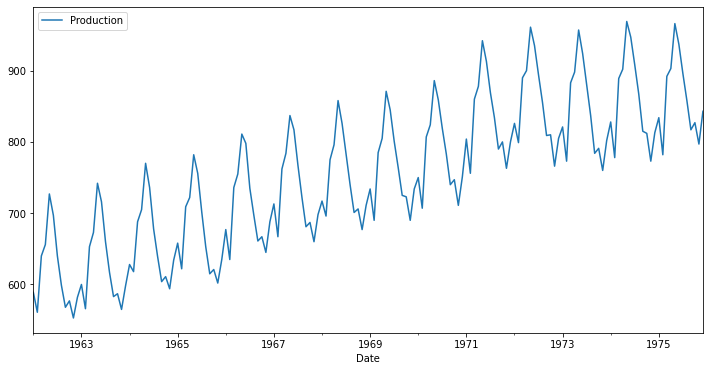

In [3]:
df.plot(figsize=(12,6));

In [4]:
df['Month'] = df.index.month
df.head()

,Production,Month
Date,,
1962-01-01,589,1
1962-02-01,561,2
1962-03-01,640,3
1962-04-01,656,4
1962-05-01,727,5


In [5]:
df['Month Name'] = df.index.month_name()
df.head()

,Production,Month,Month Name
Date,,,
1962-01-01,589,1,January
1962-02-01,561,2,February
1962-03-01,640,3,March
1962-04-01,656,4,April
1962-05-01,727,5,May


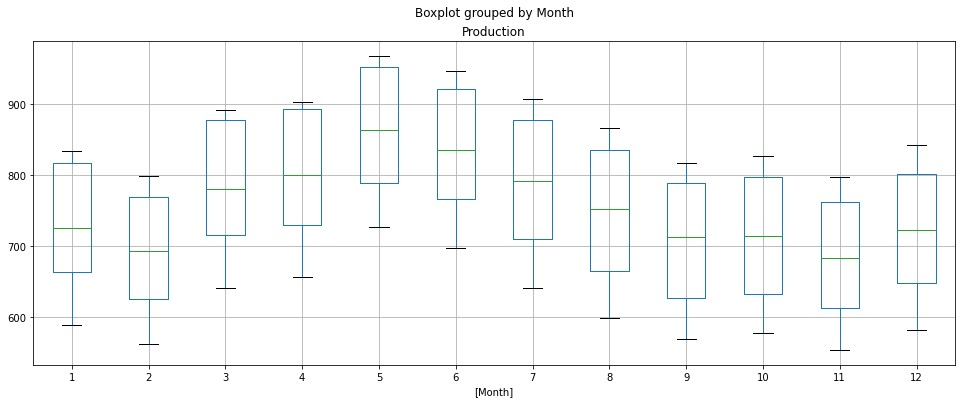

In [6]:
df.boxplot(by='Month', figsize=(16,6));

In [7]:
df = pd.read_csv('UMTMVS.csv', index_col='DATE', parse_dates=['DATE'])
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


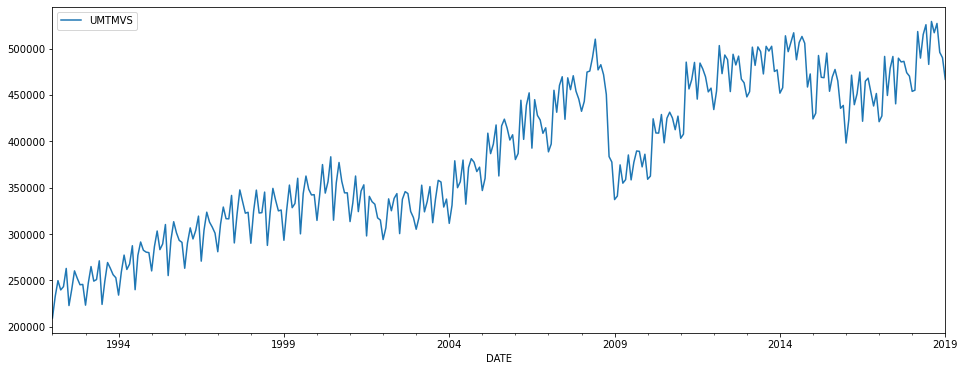

In [8]:
df.plot(figsize=(16,6));

**%** increase in value from **Jan 2009** to **Jan 2019**

In [9]:
print(f"{round(((df.loc['2019-01-01'] - df.loc['2009-01-01']) / df.loc['2009-01-01'])*100,2)}")

UMTMVS    38.47
dtype: float64%


**%** decrease in value from **Jan 2008** to **Jan 2009**

In [10]:
print(f"{round(((df.loc['2009-01-01'] - df.loc['2008-01-01']) / df.loc['2008-01-01'])*100,2)}")

UMTMVS   -22.02
dtype: float64%


**Month** with the least value.

In [12]:
df.index.min()

Timestamp('1992-01-01 00:00:00')

**Month** with the least value after 2005.

In [16]:
df.loc['2005':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

Top 6 months with highest values.

In [17]:
df.sort_values(by='UMTMVS', ascending=False).head(6)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0
2014-06-01,516935.0


How many million dollars lost in **2008** ?

In [19]:
df.loc['2008-01-01'] - df.loc['2009-01-01']

UMTMVS    95206.0
dtype: float64

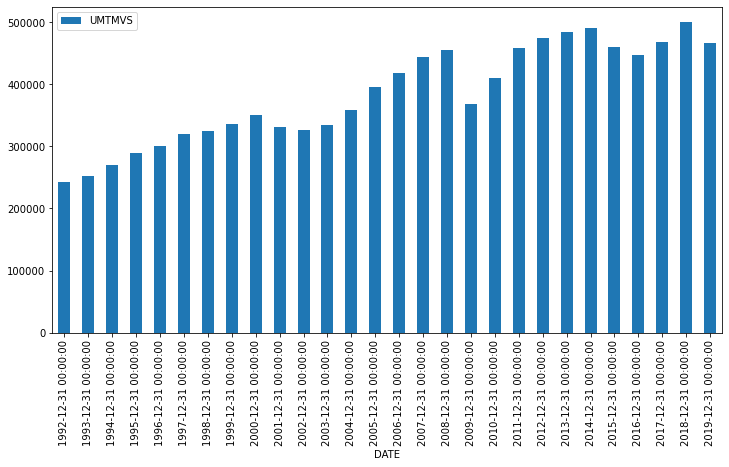

In [21]:
df.resample(rule='Y').mean().plot(kind='bar', figsize=(12,6));

Which year has the biggest increase in mean value from the previous year's mean value ?

In [26]:
yearly = df.resample(rule='Y').mean()
yearly_shift = yearly.shift(1)
change = yearly - yearly_shift
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

Plot the yearly **rolling mean** on top of orignal data.

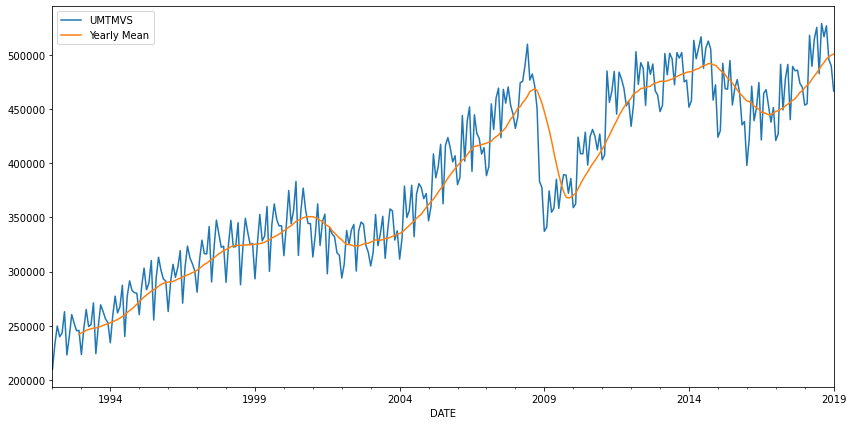

In [29]:
df['Yearly Mean'] = df['UMTMVS'].rolling(window=12).mean()
df.plot(figsize=(14, 7));